# Exploratory Data Analysis

## Objectives
* Explore the relationships between variables
* Gain insights about the data reletive to the problem


#### Import libraries and load data

In [6]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# load data

train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")
explore = pd.concat([train, val])

explore.head()

age  sex  trestbps  chol  thalach  oldpeak  target  cp_1  cp_2  cp_3  ...  \
0   60    0       102   318      160      0.0       1     0     1     0  ...   
1   59    1       140   221      164      0.0       1     1     0     0  ...   
2   58    0       170   225      146      2.8       0     0     0     0  ...   
3   64    0       130   303      122      2.0       1     0     0     0  ...   
4   37    1       130   250      187      3.5       1     0     1     0  ...   

   exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  thal_1  thal_2  thal_3  
0        0        0        1     1     0     0     0       0       1       0  
1        1        0        1     0     0     0     0       0       1       0  
2        1        1        0     0     1     0     0       1       0       0  
3        0        1        0     0     1     0     0       0       1       0  
4        0        0        0     0     0     0     0       0       1       0  

[5 rows x 23 columns]

# 1. Explore relationships between the target and each other variable

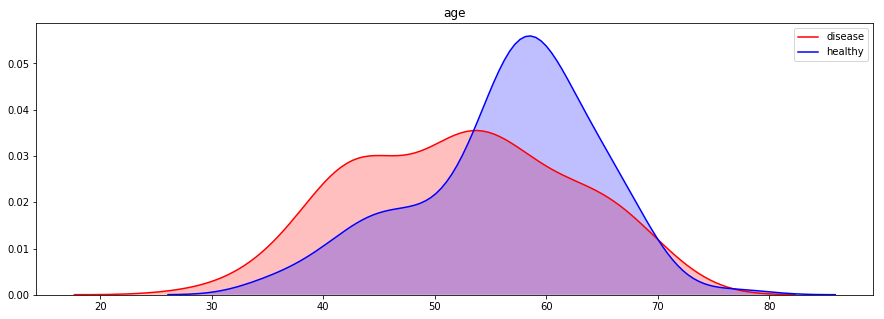

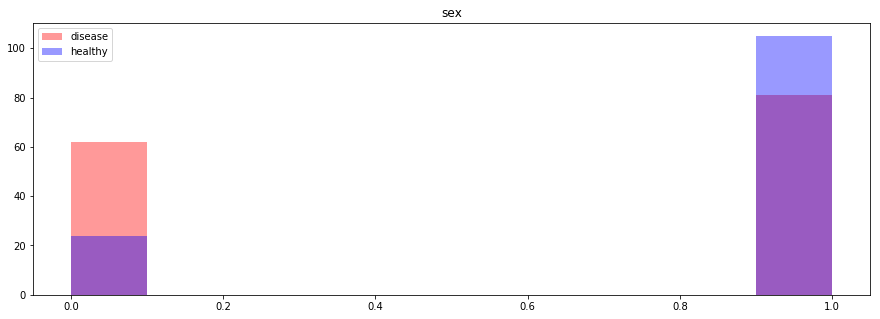

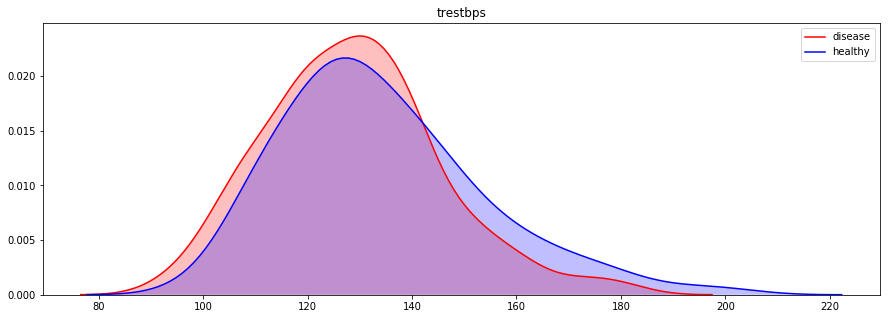

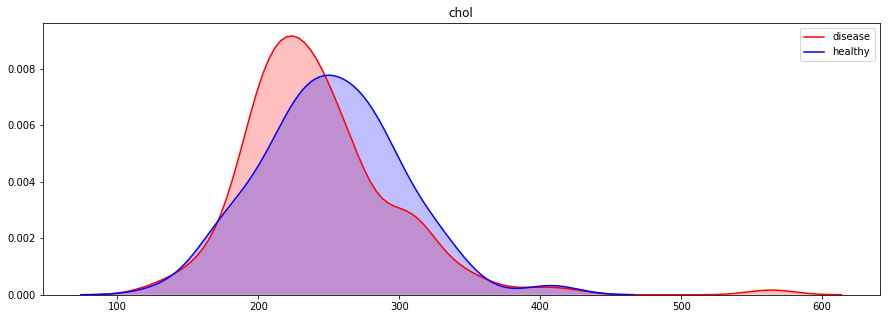

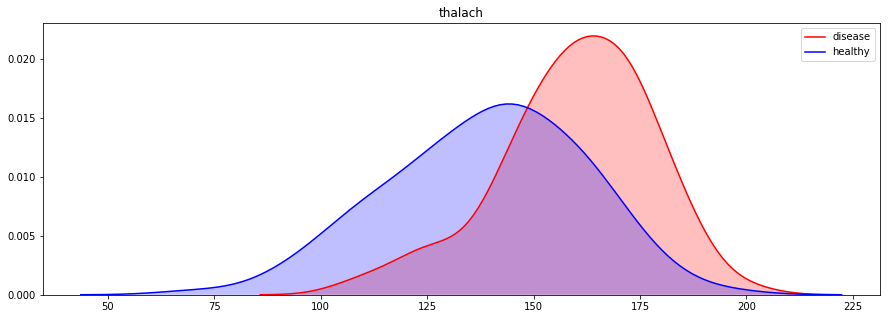

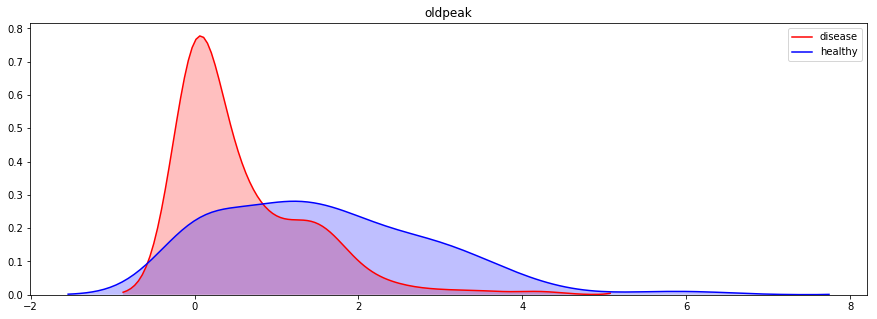

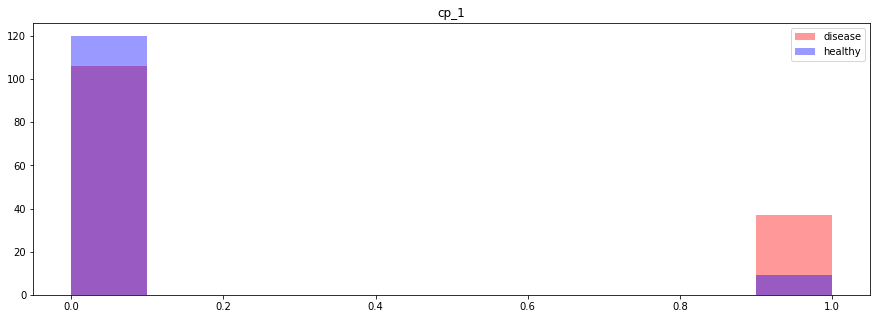

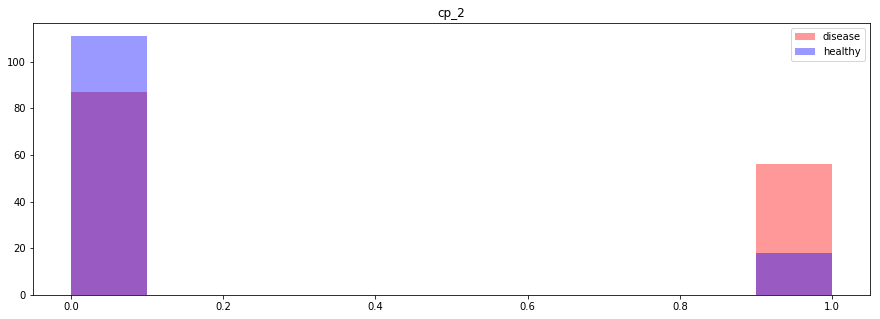

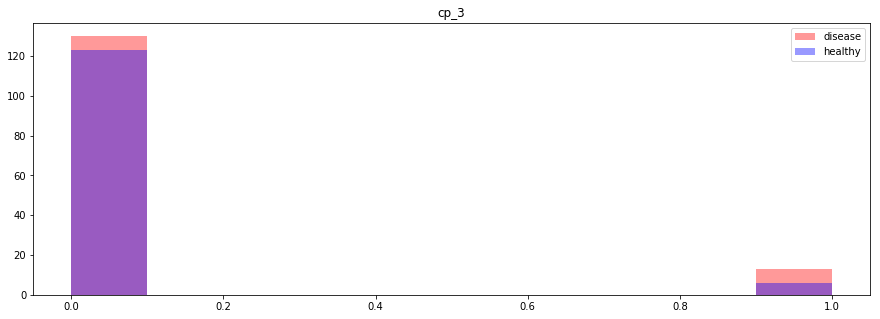

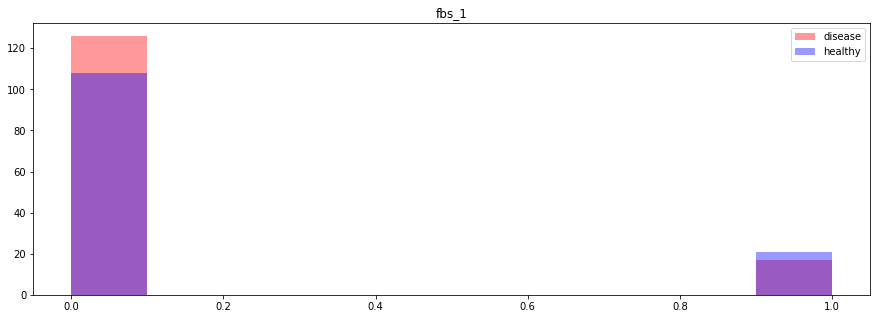

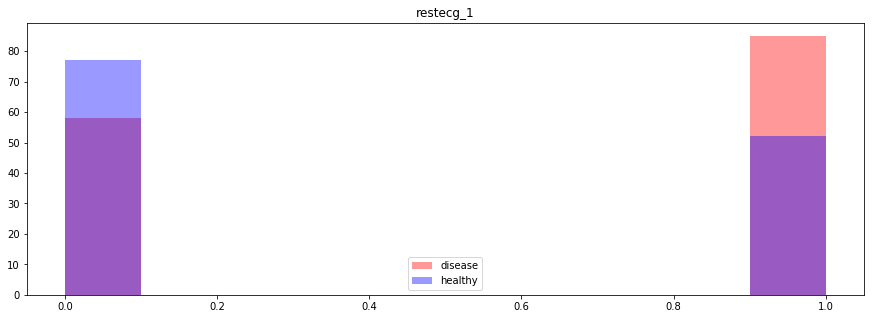

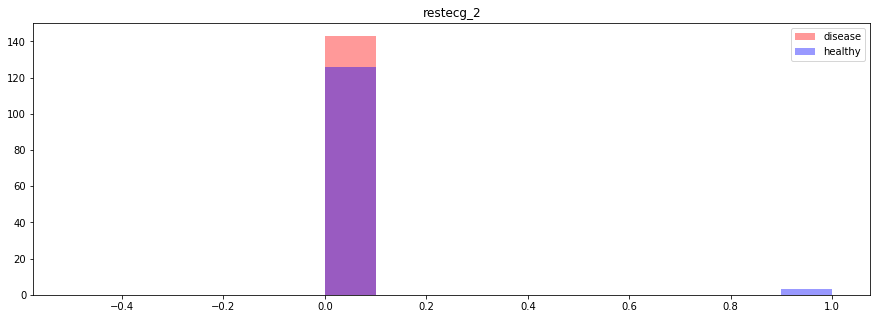

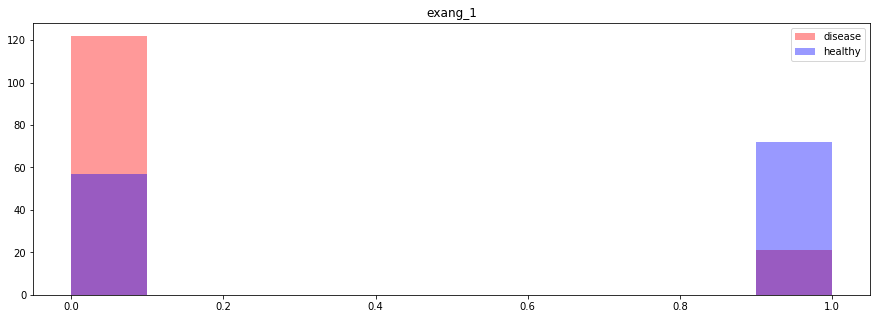

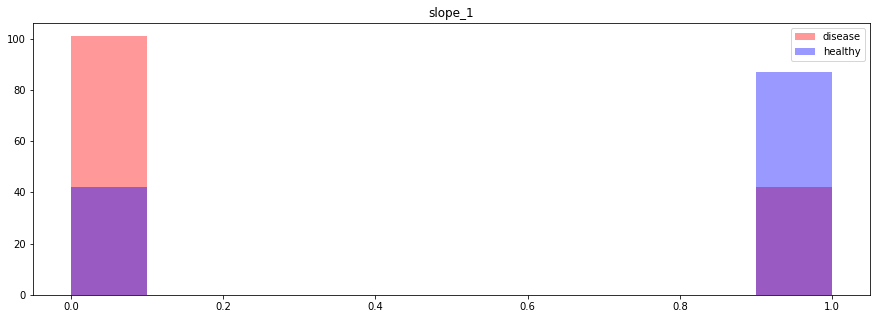

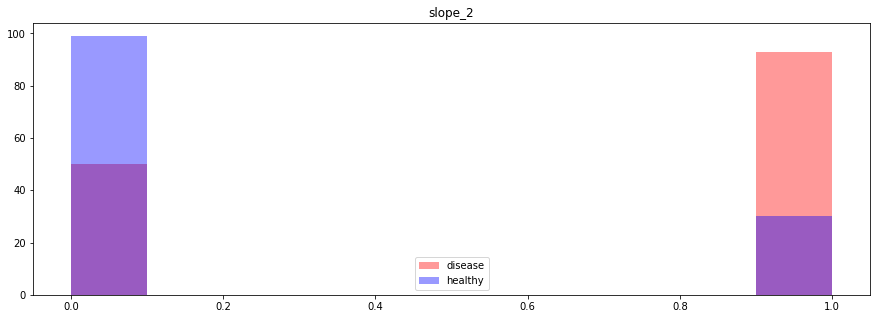

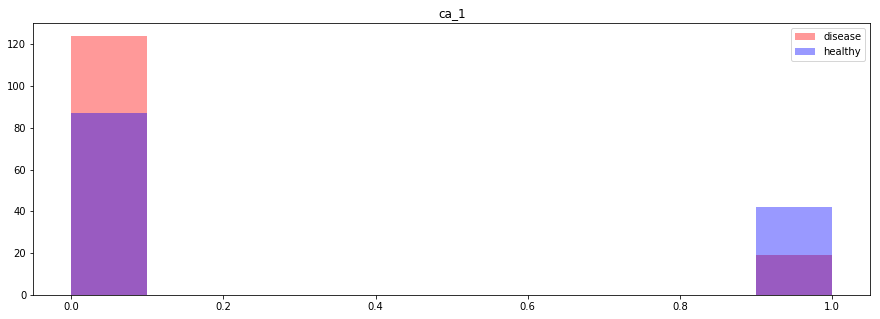

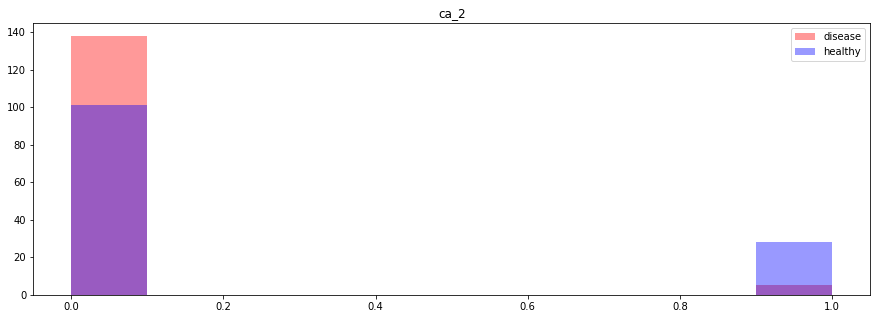

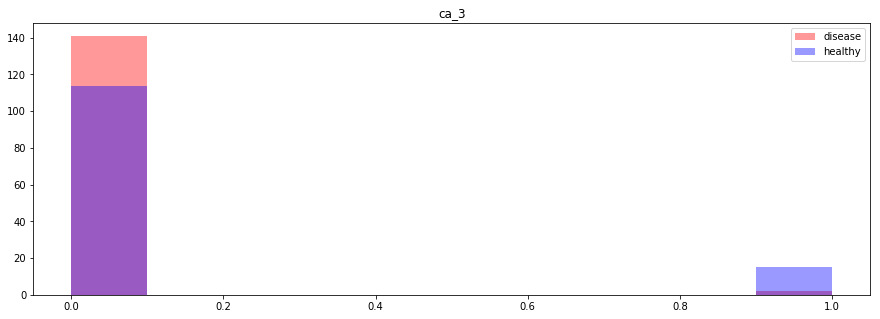

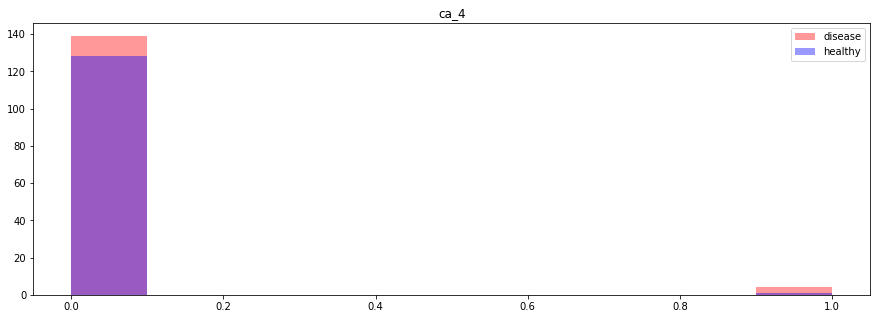

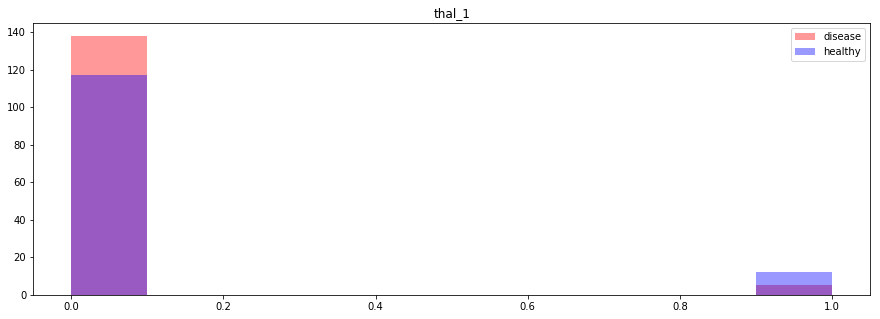

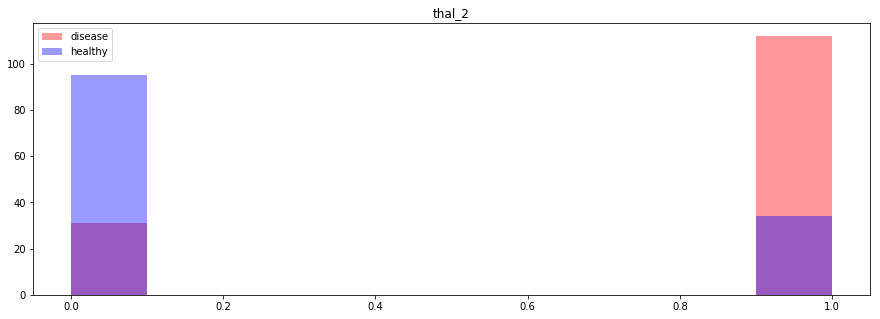

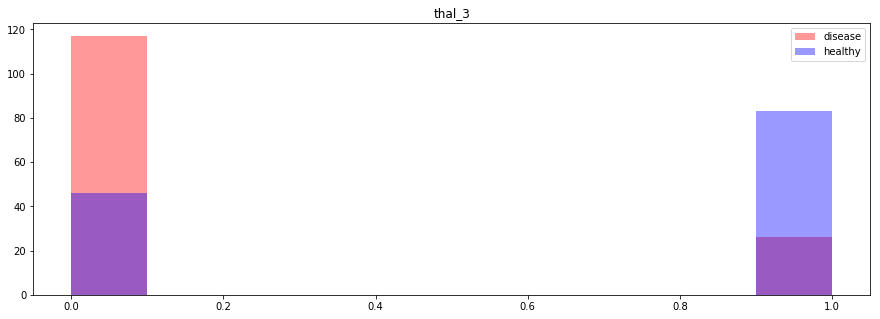

In [7]:
disease = explore[explore.target == 1]
healthy = explore[explore.target == 0]

for col in explore.columns:
    if col != "target":
        if explore[col].nunique() > 10:
            plt.figure(figsize=(15, 5))
            sns.kdeplot(disease[col], shade=True, color="red", label="disease")
            sns.kdeplot(healthy[col], shade=True, color="blue", label="healthy")
            plt.title(col)
            plt.show()
        
        else:
            plt.figure(figsize=(15, 5))
            plt.hist(disease[col], alpha=0.4, color="red", label="disease")
            plt.hist(healthy[col], alpha=0.4, color="blue", label="healthy")
            plt.legend()
            plt.title(col)
            plt.show()

#### Findings
* It seems females are more likely to be diseased
* It seems people with chest pain are more likely to be diseased
* It seems people without exercise induced anigma are more likely to be diseased
* It seems people with low ST depression induced by exercise relative to rest are more likely to be diseased
* It seems people with a high slope of the peak exercise ST segment are much more likely to be diseased
* It seems people with a low number of major vessels colored by flourosopy are more likely to be diseased
* Finally it seems people with a thal level of 2 are much more likely to be diseased

I can also one-hot-encode the catigorical columns and directly check the pearson correlation with the target.

In [8]:
# one hot encode catigorical columns

# get categorical columns
cat_cols = []
for col in explore.columns:
    if (explore[col].nunique() < 10) & (col != "target"):
        cat_cols.append(col)
        
# get dummies
dummies = pd.DataFrame([])
for col in cat_cols:
    dummy_col = pd.get_dummies(explore[col], prefix=col, drop_first=True)
    dummies = pd.concat([dummies, dummy_col], axis=1)

# replace columns with dummies
explore_dummies = explore.copy()
explore_dummies.drop(cat_cols, axis=1, inplace=True)
explore_dummies = pd.concat([explore_dummies, dummies], axis=1)

explore_dummies.head()

    

age  trestbps  chol  thalach  oldpeak  target  sex_1  cp_1_1  cp_2_1  \
0   60       102   318      160      0.0       1      0       0       1   
1   59       140   221      164      0.0       1      1       1       0   
2   58       170   225      146      2.8       0      0       0       0   
3   64       130   303      122      2.0       1      0       0       0   
4   37       130   250      187      3.5       1      1       0       1   

   cp_3_1  ...  exang_1_1  slope_1_1  slope_2_1  ca_1_1  ca_2_1  ca_3_1  \
0       0  ...          0          0          1       1       0       0   
1       0  ...          1          0          1       0       0       0   
2       0  ...          1          1          0       0       1       0   
3       0  ...          0          1          0       0       1       0   
4       0  ...          0          0          0       0       0       0   

   ca_4_1  thal_1_1  thal_2_1  thal_3_1  
0       0         0         1         0  
1       0         0         1         0  
2       0         1         0         0  
3       0         0         1         0  
4       0         0         1         0  

[5 rows x 23 columns]

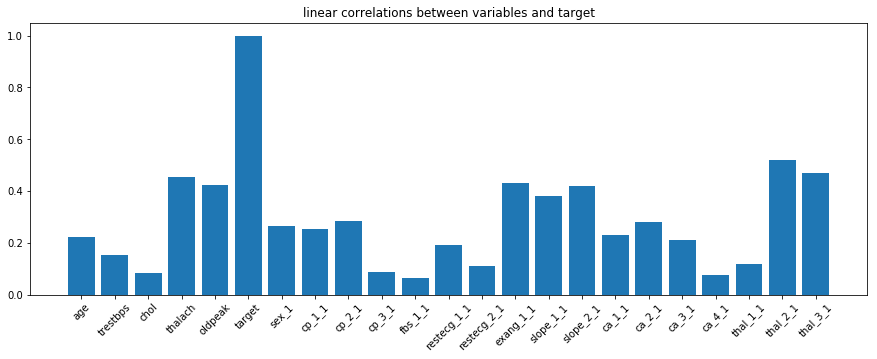

In [9]:
# explore correlation
correlations = []
for col in explore_dummies.columns:
    correlations.append(abs(explore_dummies.corr()["target"][col]))
    
plt.figure(figsize=(15, 5))
plt.bar(explore_dummies.columns, correlations)
plt.title("linear correlations between variables and target")
plt.xticks(rotation=45)
plt.show()

# 2. Check variables correlation to target when split by sex

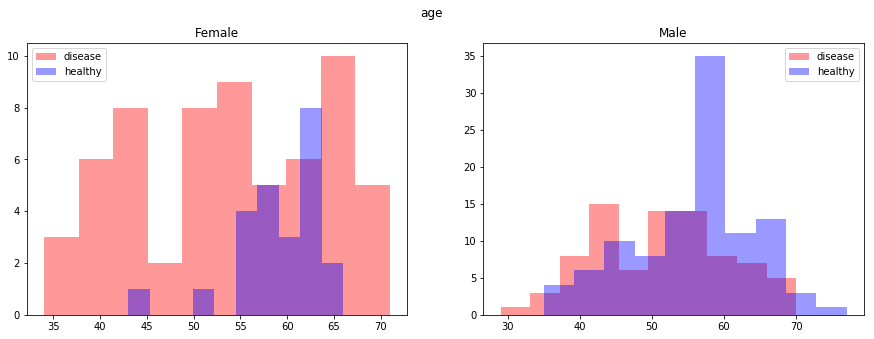

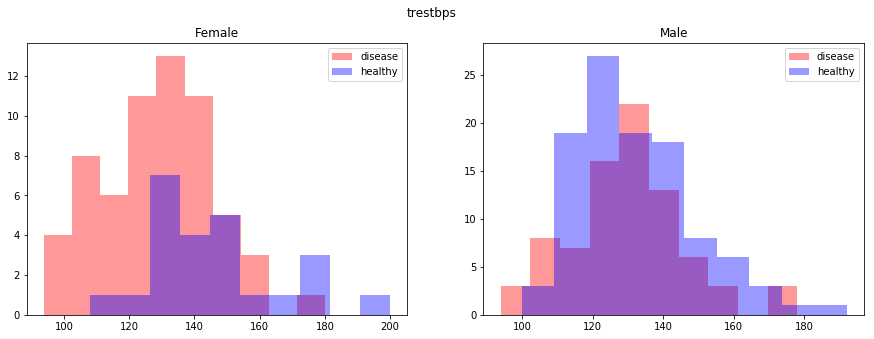

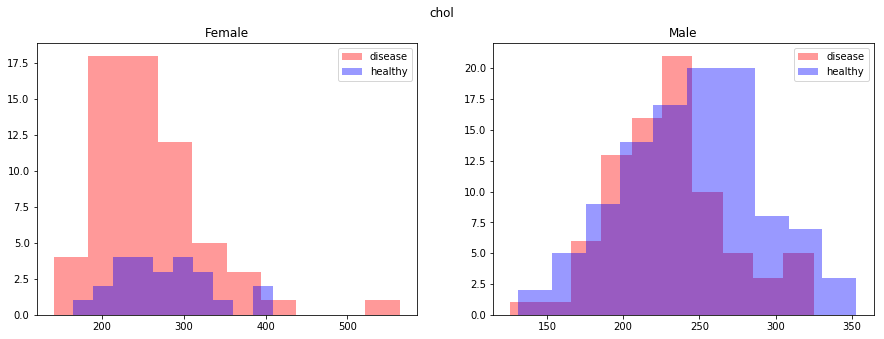

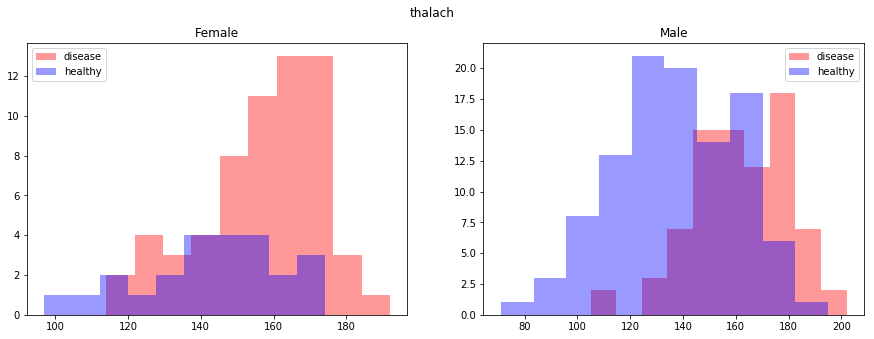

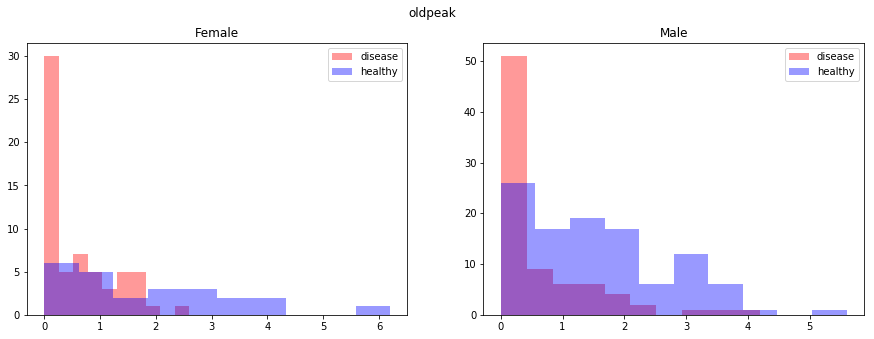

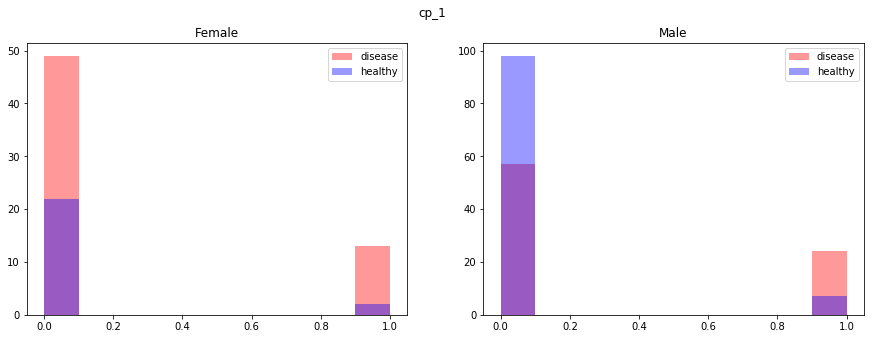

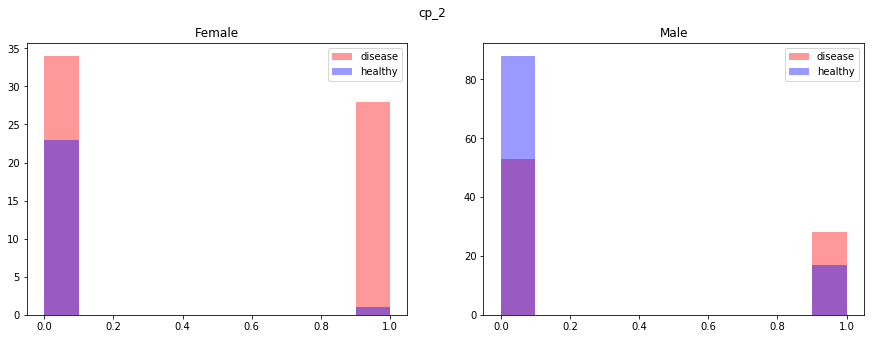

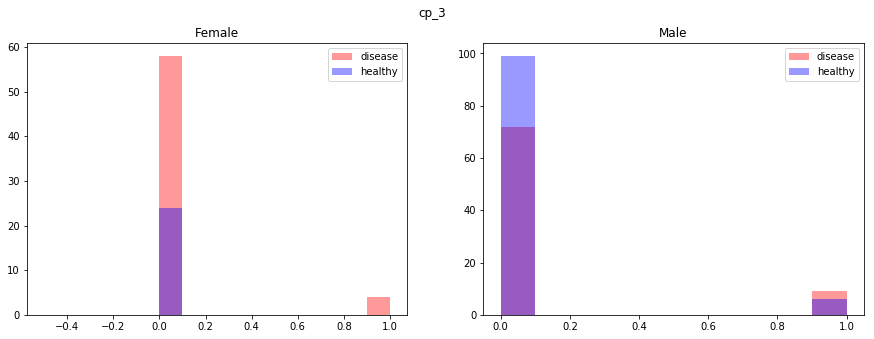

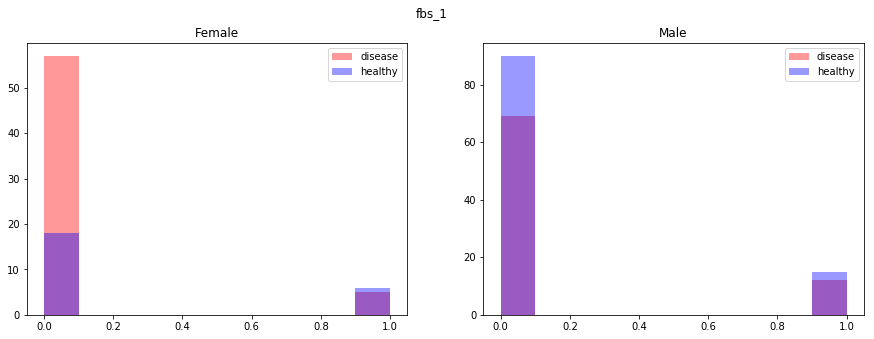

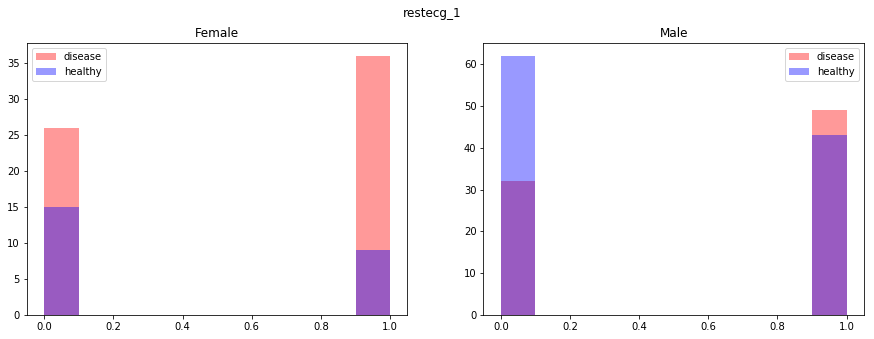

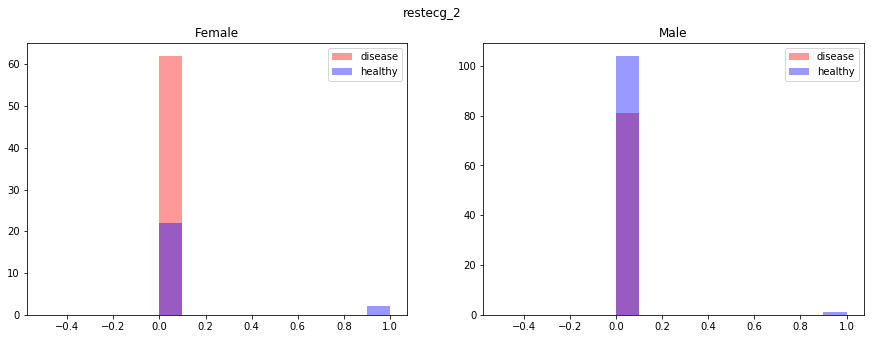

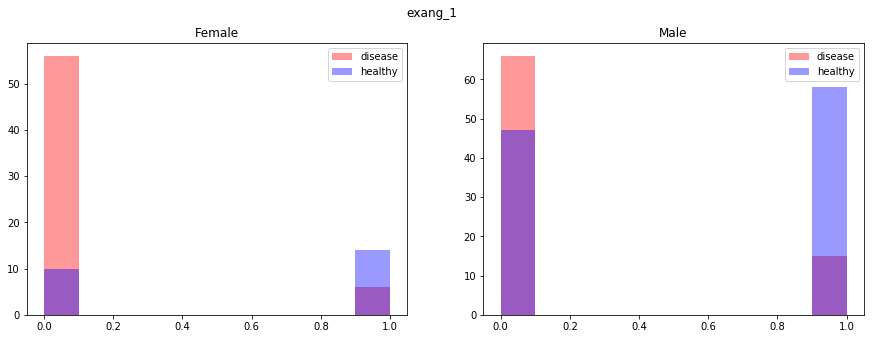

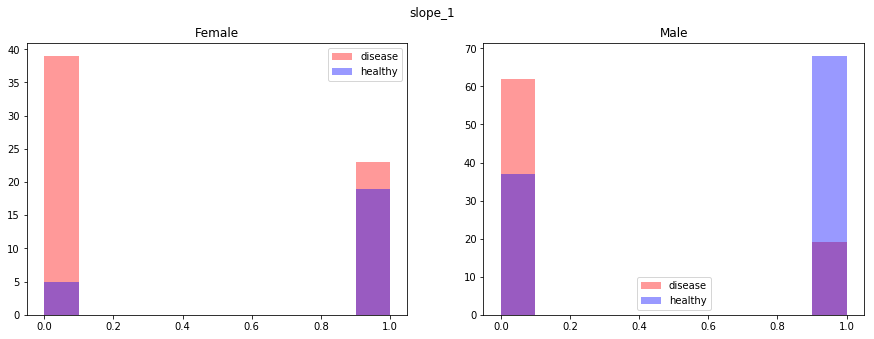

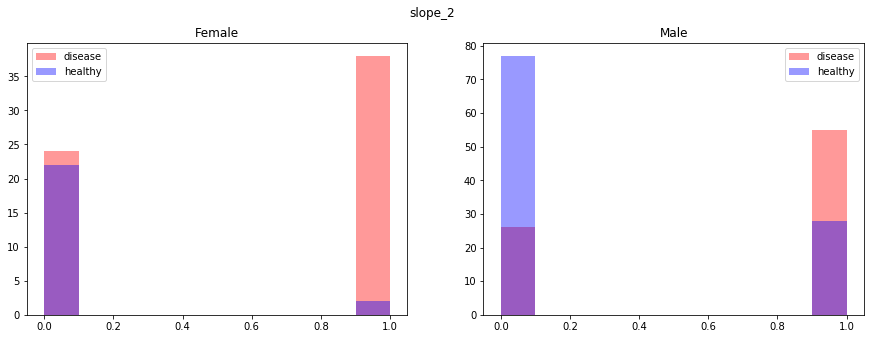

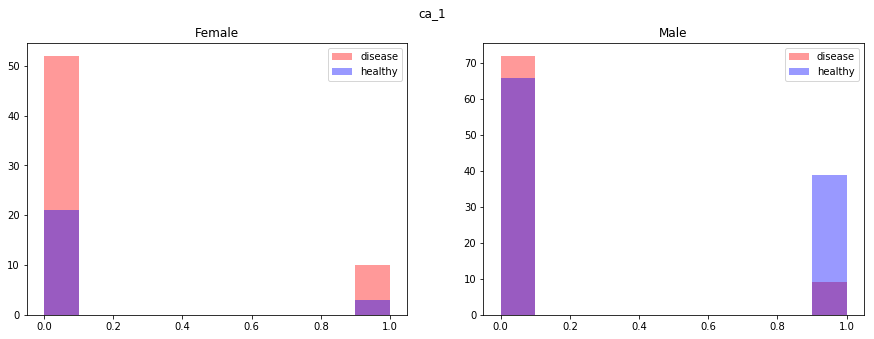

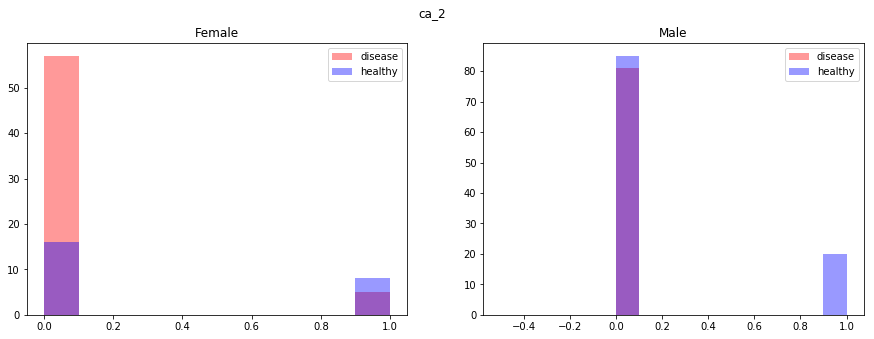

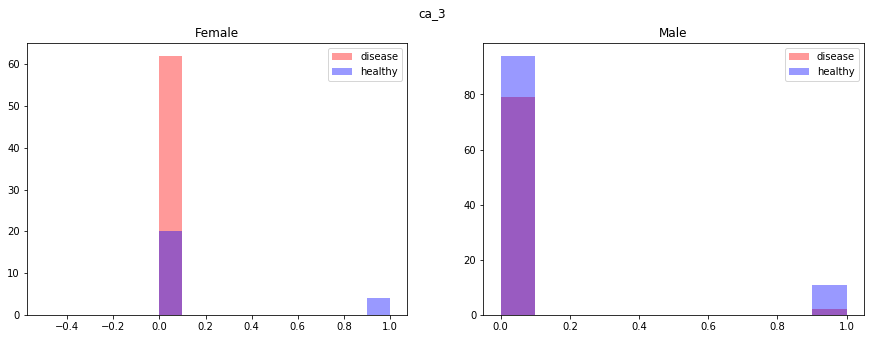

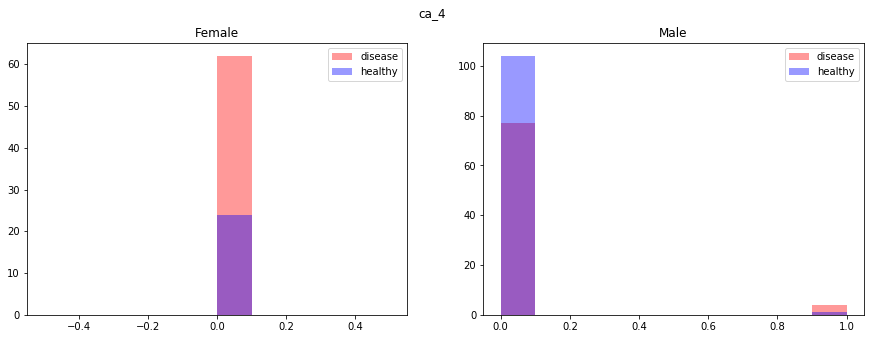

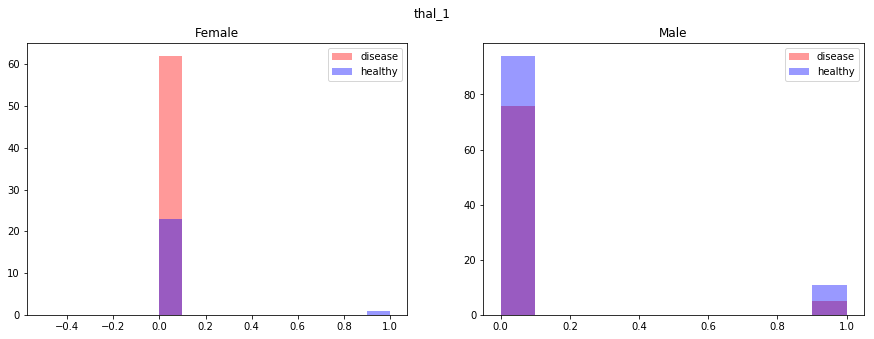

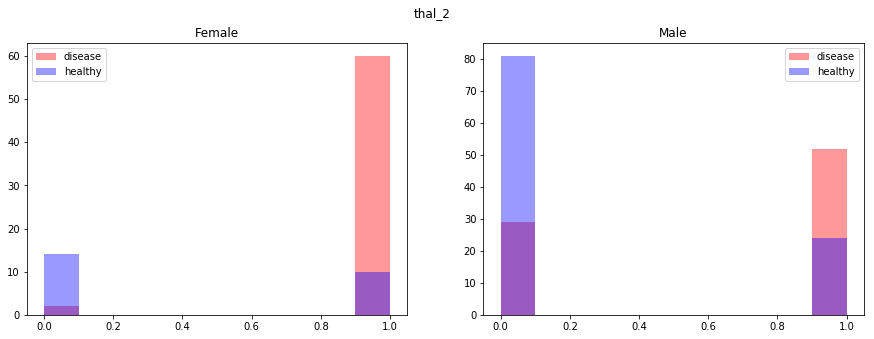

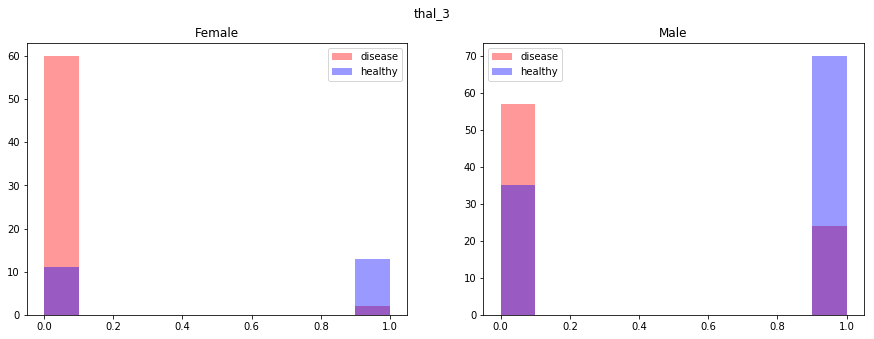

In [10]:
for col in explore.columns:
    if (col != "target") & (col != "sex"):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        ax1.set_title("Female")
        ax1.hist(disease[disease.sex == 0][col], color="red", alpha = 0.4, label="disease")
        ax1.hist(healthy[healthy.sex == 0][col], color="blue", alpha=0.4, label="healthy")
        ax1.legend()       
        ax2.set_title("Male")
        ax2.hist(disease[disease.sex == 1][col], color="red", alpha = 0.4, label="disease")
        ax2.hist(healthy[healthy.sex == 1][col], color="blue", alpha=0.4, label="healthy")
        ax2.legend()
        fig.suptitle(col)
        plt.show()

##### Insights
* It seems that a low trestbps for females is more dangerous than it is for men
* A low fasting blood sugar is more dangerous for females than for men